In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
ticker = yf.Ticker("^GSPC")
data = ticker.history(start="2000-08-30", end="2025-04-30")  # Download historical data for the S&P 500 index

# Create a DataFrame with 'date' and 'value' columns
df_SP = pd.DataFrame({
    'Date': data.index,  # Use the index as the date
    'Value': data['Close']  # Use the 'Close' price as the value
})

# Ensure both the 'date' column and index are timezone-unaware
df_SP['Date'] = pd.to_datetime(df_SP['Date']).dt.tz_localize(None)
df_SP.index = pd.to_datetime(df_SP.index).tz_localize(None)

# Export to Excel
df_SP.to_excel('SP.xlsx', index=False)  # Exclude the index if not needed
df_SP

,Date,Value
Date,,
2000-08-30,2000-08-30,1502.589966
2000-08-31,2000-08-31,1517.680054
2000-09-01,2000-09-01,1520.770020
2000-09-05,2000-09-05,1507.079956
2000-09-06,2000-09-06,1492.250000
...,...,...
2025-04-23,2025-04-23,5375.859863
2025-04-24,2025-04-24,5484.770020
2025-04-25,2025-04-25,5525.209961


In [3]:
ticker = yf.Ticker("GC=F")
data = ticker.history(start="2000-08-30", end="2025-04-30")  # Download historical data for the Gold Futures

# Create a DataFrame with 'date' and 'value' columns
df_XAU = pd.DataFrame({
    'Date': data.index,  # Use the index as the date
    'Price': data['Close']  # Use the 'Close' price as the value
})

# Ensure both the 'date' column and index are timezone-unaware
df_XAU['Date'] = pd.to_datetime(df_XAU['Date']).dt.tz_localize(None)
df_XAU.index = pd.to_datetime(df_XAU.index).tz_localize(None)

# Export to Excel
df_XAU.to_excel('XAU.xlsx', index=False)
df_XAU

,Date,Price
Date,,
2000-08-30,2000-08-30,273.899994
2000-08-31,2000-08-31,278.299988
2000-09-01,2000-09-01,277.000000
2000-09-05,2000-09-05,275.799988
2000-09-06,2000-09-06,274.200012
...,...,...
2025-04-23,2025-04-23,3276.300049
2025-04-24,2025-04-24,3332.000000
2025-04-25,2025-04-25,3282.399902


In [5]:
df_DFF = pd.read_excel('DFF.xlsx')
df_DFF['Date'] = pd.to_datetime(df_DFF['Date'])
filtered_df_DFF = df_DFF[df_DFF['Date'] >= '2000-08-30']
print(filtered_df_DFF)
df_DFF = filtered_df_DFF

            Date  Rate
16862 2000-08-30  6.51
16863 2000-08-31  6.65
16864 2000-09-01  6.52
16865 2000-09-02  6.52
16866 2000-09-03  6.52
...          ...   ...
25879 2025-05-08  4.33
25880 2025-05-09  4.33
25881 2025-05-10  4.33
25882 2025-05-11  4.33
25883 2025-05-12  4.33

[9022 rows x 2 columns]


In [11]:
df_CPI = pd.read_excel('FPCPITOTLZGUSA.xlsx')
df_CPI['Date'] = pd.to_datetime(df_CPI['Date'])
filtered_df_CPI = df_CPI[df_CPI['Date'] >= '2000-01-01']
print(filtered_df_CPI)
df_CPI = filtered_df_CPI

         Date  Annual CPI
40 2000-01-01    3.376857
41 2001-01-01    2.826171
42 2002-01-01    1.586032
43 2003-01-01    2.270095
44 2004-01-01    2.677237
45 2005-01-01    3.392747
46 2006-01-01    3.225944
47 2007-01-01    2.852672
48 2008-01-01    3.839100
49 2009-01-01   -0.355546
50 2010-01-01    1.640043
51 2011-01-01    3.156842
52 2012-01-01    2.069337
53 2013-01-01    1.464833
54 2014-01-01    1.622223
55 2015-01-01    0.118627
56 2016-01-01    1.261583
57 2017-01-01    2.130110
58 2018-01-01    2.442583
59 2019-01-01    1.812210
60 2020-01-01    1.233584
61 2021-01-01    4.697859
62 2022-01-01    8.002800
63 2023-01-01    4.116338
64 2024-01-01    2.949525


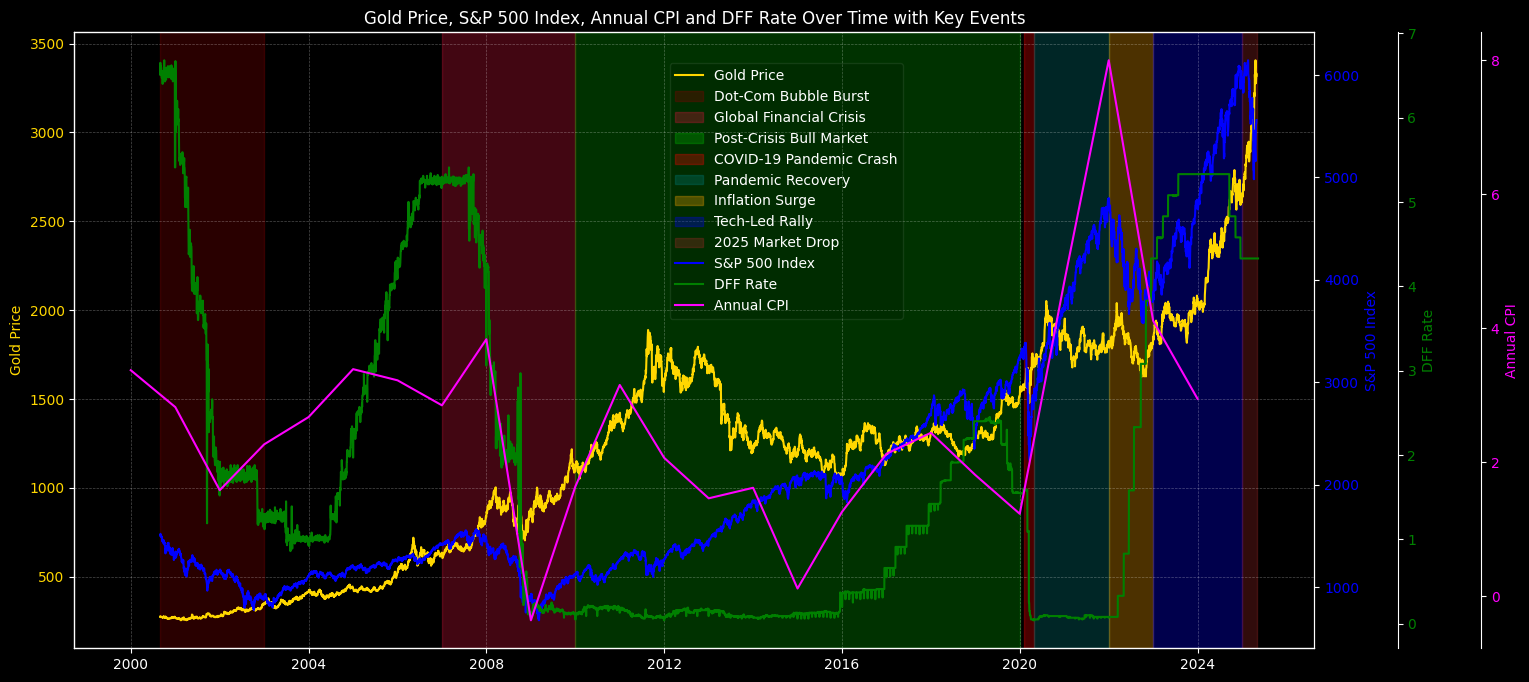

In [25]:
# Ensure 'Date' columns are datetime
df_XAU['Date'] = pd.to_datetime(df_XAU['Date'])
df_SP['Date'] = pd.to_datetime(df_SP['Date'])
df_DFF['Date'] = pd.to_datetime(df_DFF['Date'])
df_CPI['Date'] = pd.to_datetime(df_CPI['Date'])

# Ensure 'Price', 'Value', 'Rate' and 'Annual CPI' columns are numeric
df_XAU['Price'] = pd.to_numeric(df_XAU['Price'], errors='coerce')
df_SP['Value'] = pd.to_numeric(df_SP['Value'], errors='coerce')
df_DFF['Rate'] = pd.to_numeric(df_DFF['Rate'], errors='coerce')
df_CPI['Rate'] = pd.to_numeric(df_CPI['Annual CPI'], errors='coerce')

# Plot the data
plt.style.use('dark_background')
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot Gold Prices on the first y-axis
ax1.plot(df_XAU['Date'], df_XAU['Price'], color='gold', label='Gold Price')
ax1.set_ylabel('Gold Price', color='gold')
ax1.tick_params(axis='y', labelcolor='gold')

# Plot S&P 500 Index on the second y-axis
ax2 = ax1.twinx()
ax2.plot(df_SP['Date'], df_SP['Value'], color='blue', label='S&P 500 Index')
ax2.set_ylabel('S&P 500 Index', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Plot DFF (Federal Funds Rate) on the third y-axis
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis
ax3.plot(df_DFF['Date'], df_DFF['Rate'], color='green', label='DFF Rate')
ax3.set_ylabel('DFF Rate', color='green')
ax3.tick_params(axis='y', labelcolor='green')

# Plot Annual CPI on the fourth y-axis
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))  # Offset the fourth axis
ax4.plot(df_CPI['Date'], df_CPI['Annual CPI'], color='magenta', label='Annual CPI')
ax4.set_ylabel('Annual CPI', color='magenta')
ax4.tick_params(axis='y', labelcolor='magenta')

# Mark specific dates and periods
# Dot-Com Bubble Burst (2000–2002)
ax1.axvspan(pd.Timestamp('2000-08-30'), pd.Timestamp('2002-12-31'), color='darkred', alpha=0.3, label='Dot-Com Bubble Burst')

# Global Financial Crisis (2007–2009)
ax1.axvspan(pd.Timestamp('2007-01-01'), pd.Timestamp('2009-12-31'), color='crimson', alpha=0.3, label='Global Financial Crisis')

# Post-Crisis Bull Market (2009–2020)
ax1.axvspan(pd.Timestamp('2010-01-01'), pd.Timestamp('2020-01-01'), color='lime', alpha=0.2, label='Post-Crisis Bull Market')

# COVID-19 Pandemic Crash (2020)
ax1.axvspan(pd.Timestamp('2020-02-01'), pd.Timestamp('2020-04-30'), color='red', alpha=0.3, label='COVID-19 Pandemic Crash')

# Pandemic Recovery and Stimulus (2020–2021)
ax1.axvspan(pd.Timestamp('2020-05-01'), pd.Timestamp('2021-12-31'), color='teal', alpha=0.3, label='Pandemic Recovery')

# Inflation Surge and Federal Reserve Rate Hikes (2022)
ax1.axvspan(pd.Timestamp('2022-01-01'), pd.Timestamp('2022-12-31'), color='orange', alpha=0.3, label='Inflation Surge')

# Tech-Led Rally (2023–2024)
ax1.axvspan(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-12-31'), color='blue', alpha=0.3, label='Tech-Led Rally')

# Market Drop from Trade Policy Uncertainty (2025)
ax1.axvspan(pd.Timestamp('2025-01-01'), pd.Timestamp('2025-04-30'), color='brown', alpha=0.3, label='2025 Market Drop')


# Add a legend
fig.legend(loc="upper center", bbox_to_anchor=(0.57, 0.85), framealpha=0.1)

# Add grid lines to the primary axis (ax1)
ax1.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.3, color='white')

# Disable grid lines for other axes
ax2.grid(False)  # Disable grid for the second y-axis
ax3.grid(False)  # Disable grid for the third y-axis
ax4.grid(False)  # Disable grid for the fourth y-axis (if applicable)

# Show the plot
plt.title('Gold Price, S&P 500 Index, Annual CPI and DFF Rate Over Time with Key Events')
plt.show()

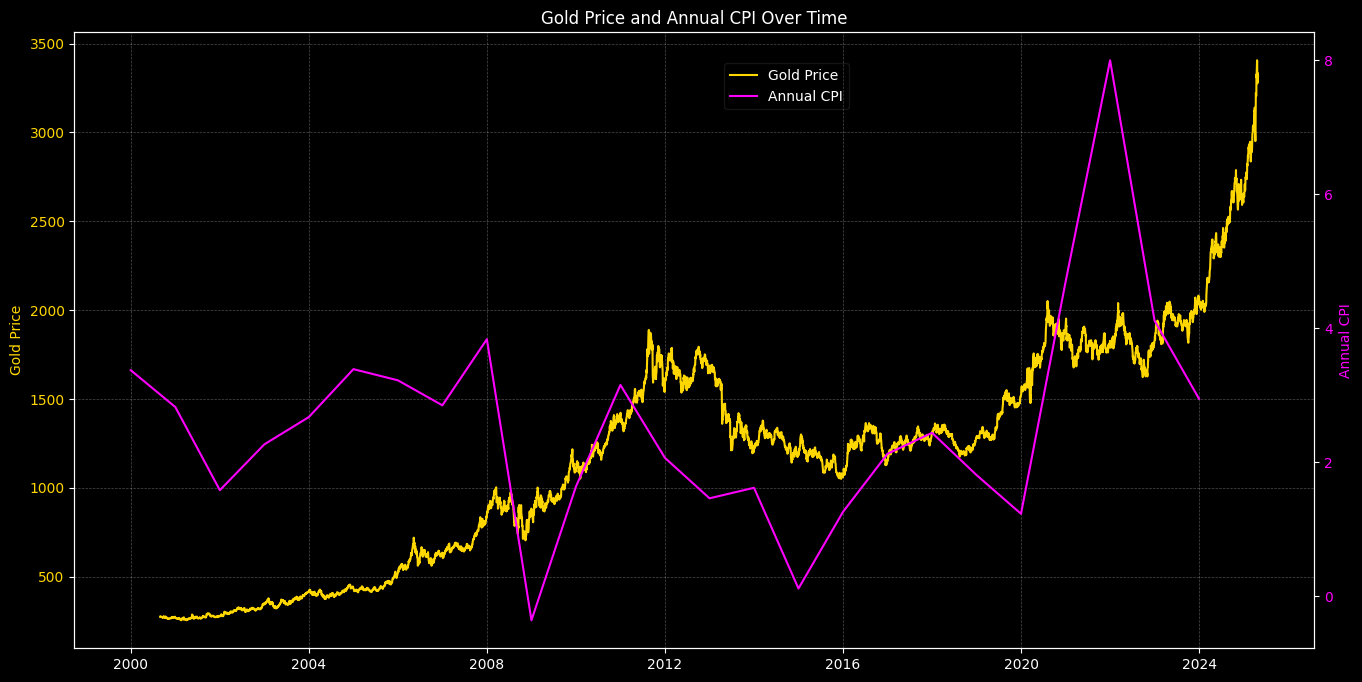

In [26]:
#Gold vs CPI graph

# Plot the data
plt.style.use('dark_background')
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot Gold Prices on the first y-axis
ax1.plot(df_XAU['Date'], df_XAU['Price'], color='gold', label='Gold Price')
ax1.set_ylabel('Gold Price', color='gold')
ax1.tick_params(axis='y', labelcolor='gold')

# Plot Annual CPI on the second y-axis
ax4 = ax1.twinx()
ax4.plot(df_CPI['Date'], df_CPI['Annual CPI'], color='magenta', label='Annual CPI')
ax4.set_ylabel('Annual CPI', color='magenta')
ax4.tick_params(axis='y', labelcolor='magenta')

# Add a legend
fig.legend(loc="upper center", bbox_to_anchor=(0.57, 0.85), framealpha=0.1)

# Add grid lines to the primary axis (ax1)
ax1.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.3, color='white')

# Disable grid lines for other axes
ax4.grid(False)  # Disable grid for the second y-axis

# Show the plot
plt.title('Gold Price and Annual CPI Over Time')
plt.show()

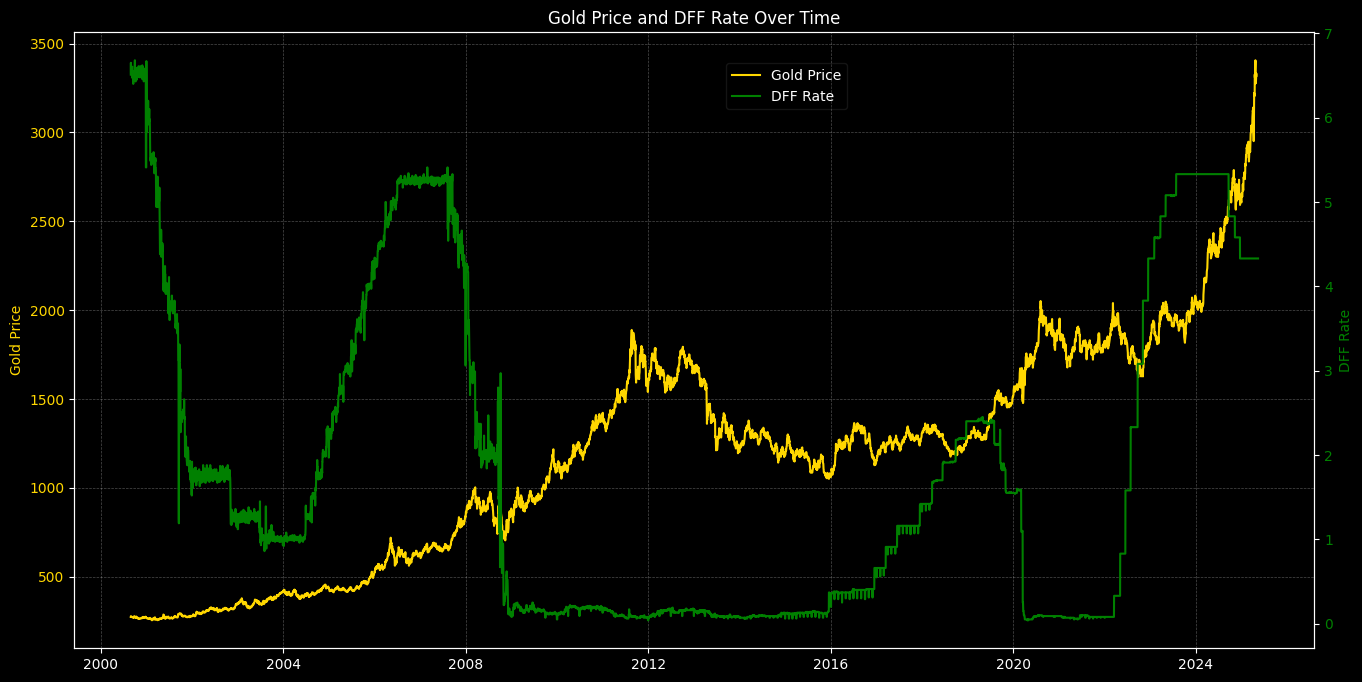

In [27]:
#Gold vs DFF graph

# Plot the data
plt.style.use('dark_background')
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot Gold Prices on the first y-axis
ax1.plot(df_XAU['Date'], df_XAU['Price'], color='gold', label='Gold Price')
ax1.set_ylabel('Gold Price', color='gold')
ax1.tick_params(axis='y', labelcolor='gold')

# Plot DFF (Federal Funds Rate) on the second y-axis
ax3 = ax1.twinx()
ax3.plot(df_DFF['Date'], df_DFF['Rate'], color='green', label='DFF Rate')
ax3.set_ylabel('DFF Rate', color='green')
ax3.tick_params(axis='y', labelcolor='green')

# Add a legend
fig.legend(loc="upper center", bbox_to_anchor=(0.57, 0.85), framealpha=0.1)

# Add grid lines to the primary axis (ax1)
ax1.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.3, color='white')

# Disable grid lines for other axes
ax3.grid(False)  # Disable grid for the second y-axis

# Show the plot
plt.title('Gold Price and DFF Rate Over Time')
plt.show()

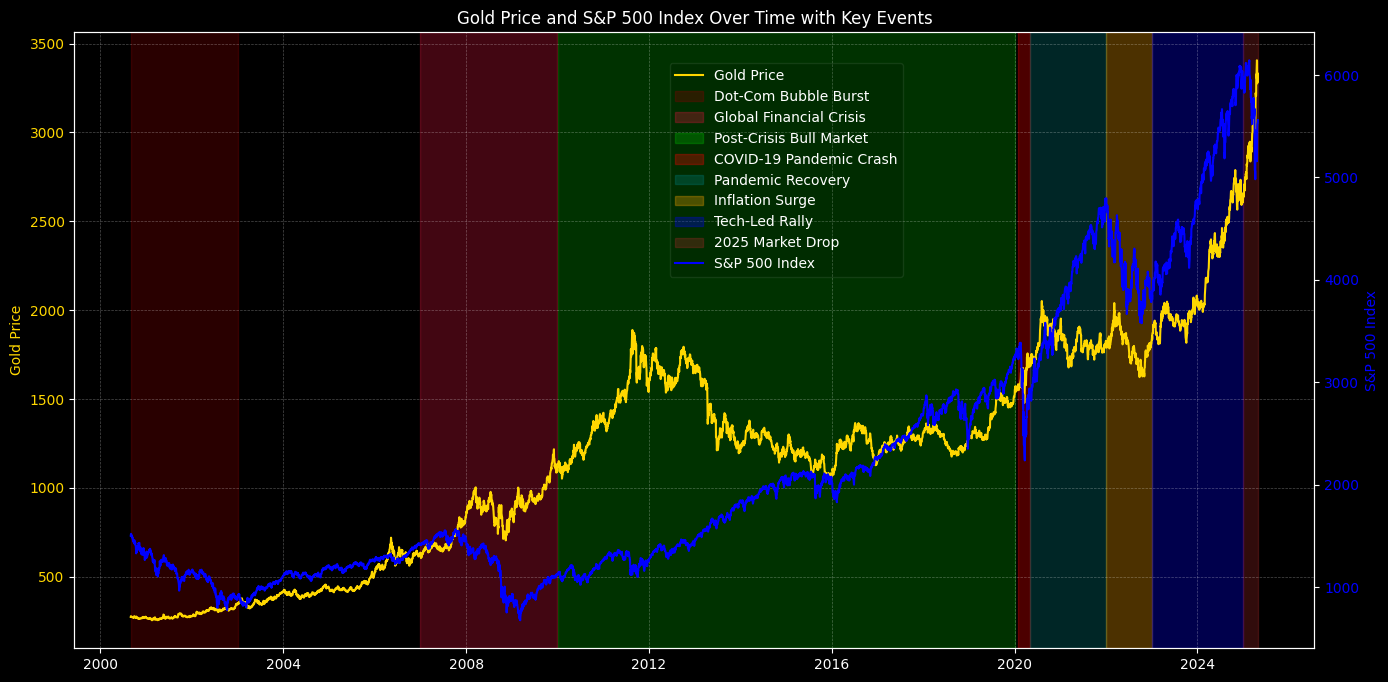

In [28]:
#Gold vs S&P500 graph

# Plot the data
plt.style.use('dark_background')
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot Gold Prices on the first y-axis
ax1.plot(df_XAU['Date'], df_XAU['Price'], color='gold', label='Gold Price')
ax1.set_ylabel('Gold Price', color='gold')
ax1.tick_params(axis='y', labelcolor='gold')

# Plot S&P 500 Index on the second y-axis
ax2 = ax1.twinx()
ax2.plot(df_SP['Date'], df_SP['Value'], color='blue', label='S&P 500 Index')
ax2.set_ylabel('S&P 500 Index', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Mark specific dates and periods
# Dot-Com Bubble Burst (2000–2002)
ax1.axvspan(pd.Timestamp('2000-08-30'), pd.Timestamp('2002-12-31'), color='darkred', alpha=0.3, label='Dot-Com Bubble Burst')

# Global Financial Crisis (2007–2009)
ax1.axvspan(pd.Timestamp('2007-01-01'), pd.Timestamp('2009-12-31'), color='crimson', alpha=0.3, label='Global Financial Crisis')

# Post-Crisis Bull Market (2009–2020)
ax1.axvspan(pd.Timestamp('2010-01-01'), pd.Timestamp('2020-01-01'), color='lime', alpha=0.2, label='Post-Crisis Bull Market')

# COVID-19 Pandemic Crash (2020)
ax1.axvspan(pd.Timestamp('2020-02-01'), pd.Timestamp('2020-04-30'), color='red', alpha=0.3, label='COVID-19 Pandemic Crash')

# Pandemic Recovery and Stimulus (2020–2021)
ax1.axvspan(pd.Timestamp('2020-05-01'), pd.Timestamp('2021-12-31'), color='teal', alpha=0.3, label='Pandemic Recovery')

# Inflation Surge and Federal Reserve Rate Hikes (2022)
ax1.axvspan(pd.Timestamp('2022-01-01'), pd.Timestamp('2022-12-31'), color='orange', alpha=0.3, label='Inflation Surge')

# Tech-Led Rally (2023–2024)
ax1.axvspan(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-12-31'), color='blue', alpha=0.3, label='Tech-Led Rally')

# Market Drop from Trade Policy Uncertainty (2025)
ax1.axvspan(pd.Timestamp('2025-01-01'), pd.Timestamp('2025-04-30'), color='brown', alpha=0.3, label='2025 Market Drop')

# Add a legend
fig.legend(loc="upper center", bbox_to_anchor=(0.57, 0.85), framealpha=0.1)

# Add grid lines to the primary axis (ax1)
ax1.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.3, color='white')

# Disable grid lines for other axes
ax2.grid(False)  # Disable grid for the second y-axis

# Show the plot
plt.title('Gold Price and S&P 500 Index Over Time with Key Events')
plt.show()

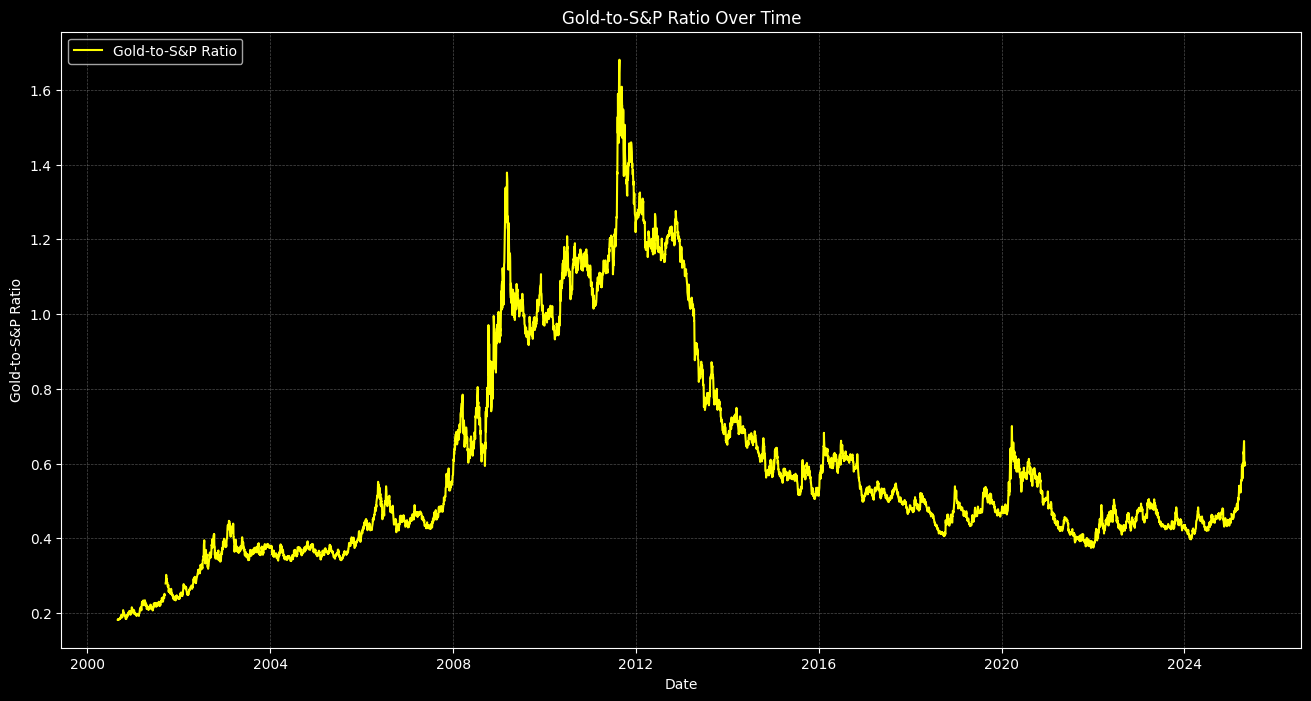

In [ ]:
#Gold-to-S&P500 ratio graph

# Calculate the Gold-to-S&P Ratio
df_ratio = pd.DataFrame()
df_ratio['Date'] = pd.to_datetime(df_XAU['Date'])  # Ensure 'Date' is datetime
df_ratio['Gold-to-S&P Ratio'] = df_XAU['Price'] / df_SP['Value']  # Calculate the ratio

# Plot the Gold-to-S&P Ratio
plt.style.use('dark_background')
plt.figure(figsize=(16, 8))

# Plot the ratio as a single line
plt.plot(df_ratio['Date'], df_ratio['Gold-to-S&P Ratio'], color='yellow', label='Gold-to-S&P Ratio')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Gold-to-S&P Ratio')
plt.title('Gold-to-S&P Ratio Over Time')
plt.legend(loc='upper left')

# Add grid for better readability
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.3, color='white')

# Show the plot
plt.show()